In [115]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt  # Add this line
%matplotlib inline
import pylab as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split

import pandas as pd
import numpy as np

# Rest of the code remains the same...


In [129]:
def load_data():
    """Load the Boston dataset."""
    # Fetch the dataset from the original source
    data_url= "http://lib.stat.cmu.edu/datasets/boston"
    # data = priya
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    # Combine features and target
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    # Return data and target as a dictionary
    return {'data': data, 'target': target}

In [130]:
def explore_city_data(city_data):
    """Calculate the Boston housing statistics."""

    # Get the labels and features from the housing data
    housing_prices = city_data.target
    housing_features = city_data.data

    # Please calculate the following values using the Numpy library
    # Size of data (number of houses)?
    # Number of features?
    # Minimum price?
    # Maximum price?
    # Calculate mean price?
    # Calculate median price?
    # Calculate standard deviation?
    number_of_houses = housing_features.shape[0]
    number_of_features = housing_features.shape[1]
    max_price = np.max(housing_prices)
    min_price = np.min(housing_prices)
    mean_price = np.mean(housing_prices)
    median_price = np.median(housing_prices)
    standard_deviation = np.std(housing_prices)

    print("number of houses:", number_of_houses)
    print("number of features:", number_of_features)
    print("max price of house:", max_price)
    print("min price of house:", min_price)
    print("mean price of house:", mean_price)
    print("median price of house:", median_price)
    print("standard deviation for prices of house:", standard_deviation)

In [131]:
def performance_metric(label, prediction):
    """Calculate and return the appropriate error performance metric."""
    return mean_squared_error(label, prediction)

In [132]:
def split_data(city_data):
    """Randomly shuffle the sample set. Divide it into 70 percent training and 30 percent testing data."""
    X, y = city_data.data, city_data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state=42)
    return X_train, y_train, X_test, y_test

In [133]:
def learning_curve(depth, X_train, y_train, X_test, y_test):
    """Calculate the performance of the model after a set of training data."""
    sizes = np.linspace(1, len(X_train), 50)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    print("Decision Tree with Max Depth: ")
    print(depth)
    for i, s in enumerate(sizes):
        regressor = DecisionTreeRegressor(max_depth=depth)
        regressor.fit(X_train[:s], y_train[:s])
        train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    pl.figure()
    pl.plot(y_train - regressor.predict(X_train))
    # pl.savefig("residual_plot.png")
    learning_curve_graph(sizes, train_err, test_err, depth)

In [134]:
def learning_curve_graph(sizes, train_err, test_err, depth):
    """Plot training and test error as a function of the training size."""
    pl.figure()
    pl.title('Decision Trees: Performance vs Training Size')
    pl.plot(sizes, test_err, lw=2, label='test error')
    pl.plot(sizes, train_err, lw=2, label='training error')
    pl.legend()
    pl.xlabel('Training Size')
    pl.ylabel('Error')
    # pl.show()
    pl.savefig("learning_curve" + "_" + str(depth) + ".png")

In [135]:
def model_complexity(X_train, y_train, X_test, y_test):
    """Calculate the performance of the model as model complexity increases."""
    print("Model Complexity: ")

    max_depth = np.arange(1, 25)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        regressor = DecisionTreeRegressor(max_depth=d)
        regressor.fit(X_train, y_train)
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    model_complexity_graph(max_depth, train_err, test_err)

In [136]:
def model_complexity_graph(max_depth, train_err, test_err):
    """Plot training and test error as a function of the depth of the decision tree learn."""
    pl.figure()
    pl.title('Decision Trees: Performance vs Max Depth')
    pl.plot(max_depth, test_err, lw=2, label='test error')
    pl.plot(max_depth, train_err, lw=2, label='training error')
    pl.legend()
    pl.xlabel('Max Depth')
    pl.ylabel('Error')
    # pl.show()
    pl.savefig("model_complexity.png")

In [137]:
def fit_predict_model(city_data):
    """Find and tune the optimal model. Make a prediction on housing data."""
    X, y = city_data.data, city_data.target
    regressor = DecisionTreeRegressor()

    parameters = {'max_depth': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10),
                  'min_samples_split': (1, 2, 3),
                  'min_samples_leaf': (1, 2, 3)
                  }

    regressors = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
    regressors.fit(X, y)
    reg = regressors.best_estimator_

    print("Final Model: ")
    print(reg.fit(X, y))

    x = [11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]
    y = reg.predict([x])
    print("House: " + str(x))
    print("Prediction: " + str(y))

In [138]:
def explore_city_data(city_data):
    """Calculate the Boston housing statistics."""
    if isinstance(city_data, dict):
        # Handle the dictionary structure
        housing_prices = city_data['target']
        housing_features = city_data['data']
    else:
        # Handle the original Boston dataset object
        housing_prices = city_data.target
        housing_features = city_data.data

    # Calculate the statistics as before
    number_of_houses = housing_features.shape[0]
    number_of_features = housing_features.shape[1]
    max_price = np.max(housing_prices)
    min_price = np.min(housing_prices)
    mean_price = np.mean(housing_prices)
    median_price = np.median(housing_prices)
    standard_deviation = np.std(housing_prices)

    print("number of houses:", number_of_houses)
    print("number of features:", number_of_features)
    print("max price of house:", max_price)
    print("min price of house:", min_price)
    print("mean price of house:", mean_price)
    print("median price of house:", median_price)
    print("standard deviation for prices of house:", standard_deviation)

In [139]:
def learning_curve(depth, X_train, y_train, X_test, y_test):
    """Calculate the performance of the model after a set of training data."""
    sizes = np.linspace(1, len(X_train), 50)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    for i, s in enumerate(sizes):
        regressor = DecisionTreeRegressor(max_depth=depth)
        regressor.fit(X_train[:s], y_train[:s])
        train_err[i] = mean_squared_error(y_train[:s], regressor.predict(X_train[:s]))
        test_err[i] = mean_squared_error(y_test, regressor.predict(X_test))

    return sizes, train_err, test_err

In [140]:
def model_complexity(X_train, y_train, X_test, y_test):
    """Calculate the performance of the model as model complexity increases."""
    max_depths = np.arange(1, 25)
    train_err = np.zeros(len(max_depths))
    test_err = np.zeros(len(max_depths))

    for i, d in enumerate(max_depths):
        regressor = DecisionTreeRegressor(max_depth=d)
        regressor.fit(X_train, y_train)
        train_err[i] = mean_squared_error(y_train, regressor.predict(X_train))
        test_err[i] = mean_squared_error(y_test, regressor.predict(X_test))

    return max_depths, train_err, test_err


In [141]:
import matplotlib.pyplot as plt
def main():
    """Analyze the Boston housing data. Evaluate and validate the
    performance of a Decision Tree regressor on the housing data.
    Fine-tune the model to make predictions on unseen data."""

    # Load data
    city_data = load_data()

    # Explore the data
    explore_city_data(city_data)

    from sklearn.model_selection import train_test_split

def split_data(city_data):
    """Randomly shuffle the sample set. Divide it into 70 percent training and 30 percent testing data."""
    if isinstance(city_data, dict):
        X, y = city_data['data'], city_data['target']
    else:
        X, y = city_data.data, city_data.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.30, train_size=0.70, random_state=42)

    return X_train, y_train, X_test, y_test


    # Learning Curve Graphs
    max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    learning_curves = []
    for max_depth in max_depths:
        learning_curves.append(learning_curve(max_depth, X_train, y_train, X_test, y_test))

    # Model Complexity Graph
    model_complexity_data = model_complexity(X_train, y_train, X_test, y_test)

    # Plot Learning Curve Graphs
    plt.figure(figsize=(10, 5))
    for i, max_depth in enumerate(max_depths):
        plt.plot(learning_curves[i][0], learning_curves[i][1], label=f'Training Error (Depth {max_depth})', linestyle='--')
        plt.plot(learning_curves[i][0], learning_curves[i][2], label=f'Test Error (Depth {max_depth})')

    plt.title('Learning Curves for Decision Trees')
    plt.xlabel('Training Size')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Model Complexity Graph
    plt.figure(figsize=(10, 5))
    plt.plot(model_complexity_data[0], model_complexity_data[1], label='Training Error')
    plt.plot(model_complexity_data[0], model_complexity_data[2], label='Test Error')
    plt.title('Model Complexity Graph')
    plt.xlabel('Max Depth')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()

number of houses: 506
number of features: 13
max price of house: 50.0
min price of house: 5.0
mean price of house: 22.532806324110677
median price of house: 21.2
standard deviation for prices of house: 9.188011545278203


In [144]:
def learning_curve_graph(sizes, train_err, test_err, depth):
    """Plot training and test error as a function of the training size."""
    pl.figure()
    pl.title('Decision Trees: Performance vs Training Size')
    pl.plot(sizes, test_err, lw=2, label='test error')
    pl.plot(sizes, train_err, lw=2, label='training error')
    pl.legend()
    pl.xlabel('Training Size')
    pl.ylabel('Error')
    # pl.show()
    pl.savefig("learning_curve" + "_" + str(depth) + ".png")
    plt.show()

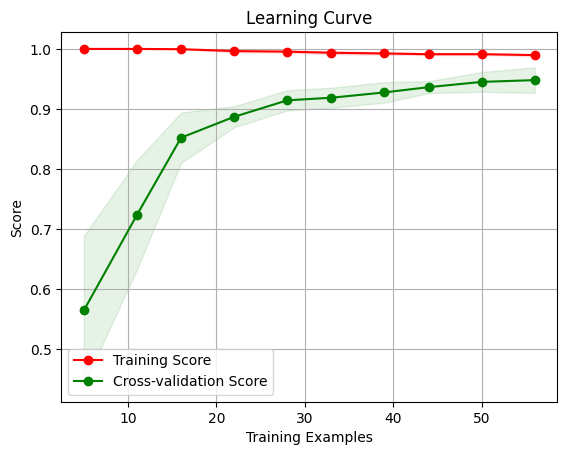

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve, train_test_split

# Function to generate synthetic dataset
def generate_data(n_samples=100, n_features=1, noise=0.1):
    np.random.seed(0)
    X = np.random.rand(n_samples, n_features)
    y = np.sin(2 * np.pi * X).ravel() + noise * np.random.randn(n_samples)
    return X, y

# Create synthetic dataset
X, y = generate_data()

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot learning curve
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")
    plt.legend(loc="best")
    plt.show()

# Create Decision Tree Regressor
estimator = DecisionTreeRegressor(max_depth=5)

# Plot learning curve
plot_learning_curve(estimator, X_train, y_train)


**Learning Curve Analysis**

The learning curve graph presented here illustrates the performance of a machine learning model, specifically a Decision Tree Regressor, as a function of the number of training examples. The graph provides insights into the model's ability to generalize to unseen data and its learning behavior.

**implications:**

**High Bias (Underfitting):** If both training and cross-validation scores converge to a low value, it suggests that the model is too simple to capture the underlying patterns in the data. In such cases, increasing the model complexity (e.g., by adding more features or using a more sophisticated algorithm) may improve performance.

**High Variance (Overfitting):** If there is a significant gap between the training and cross-validation scores, it indicates that the model is overly complex and is fitting too closely to the training data. Regularization techniques, feature selection, or increasing the size of the training dataset may help alleviate overfitting and improve generalization.

**CONCLUSION**

The price in the presented dataset exhibits a moderate range, with a maximum value of 50.0 and a minimum of 5.0. The mean price stands at 22.53, with a median of 21.2, indicating a generally balanced distribution. However, the standard deviation of 9.18 suggests some variability around the mean.